In [1]:
imgFile2 = "data/highRes/20AUG05084637-S2AS-MEDIA-Beirut-AUG05-25km.TIF"

In [12]:
import rioxarray as rxr
import matplotlib.pyplot as plt
wholeIfg = rxr.open_rasterio(imgFile2, masked=True).squeeze()
wholeIfg.values.mean()

252.05661

In [17]:
import rasterio
a = rasterio.open(imgFile2)

In [18]:
a.crs

CRS.from_epsg(32636)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


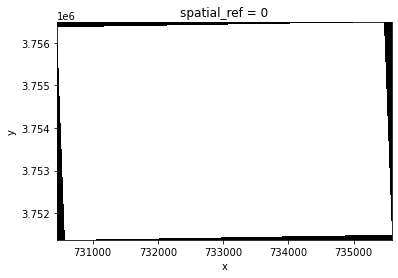

In [7]:
wholeIfg.plot.imshow()

In [1]:
imgFile1 = "data/highRes/20JUL31083035-S2AS-MEDIA-Beirut-JUL31-small.TIF"

In [3]:
jul = rxr.open_rasterio(img2, masked=True).squeeze()
jul.values.mean()

285.9347

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


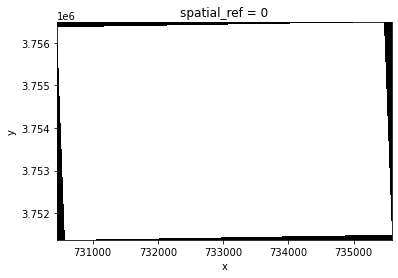

In [4]:
jul.plot.imshow()

In [9]:
# If new server on Descartes Labs, need to install rioxarray 
try: import rioxarray
except: 
    %pip install rioxarray
    
# Import helper functions
import imports as ip
import netconf as nc
import plotting as pl
import helper_functions as hf

## Define variables
# Label imports
buildingFile = "./data/beirutBuildingFootprints.geojson" # OSM data
assessmentFile = "./data/geopalData.csv" # GeoPal data
bourjData = "./data/bourjHammoud.csv" # GeoPal Extra
manualData = "./data/manualDamageClasses.csv" # GeoPal manual data
crs = 'epsg:4326' # Coordinate system
cn = 'decision' # Column for classes
splitString = True # Only use first word in class column
confidence = [0, 1] # Confidence in a priori labels (other classes, specified class)

# Data imports
dataTypes = ['ifg']
ifgPreFile = "./data/beirutPrePreExplosionIfg.tif" # SNAP output 1
ifgPostFile = "./data/beirutPrePostExplosionIfg.tif" # SNAP output 2
ifgBoth = False # If false, only uses prePost rather than difference between two

# Map filtering of location
lat, lon, zoom = 33.893, 35.512, 14 # Map properties
stdTest = False # Use standard area for Beirut testing

# Class options
nClasses = False # Enforce number of classes (False -> # classes in labels)
classNames = False # Enforce names of classes (False -> cl0, cl1,...)
classAssign = False # Enforce class grouping (False -> Clustering is performed)
pca, pcaComps, meanCluster = False, 2, True # Clustering properties if used

# Edge creation
adjacent, geoNeighbours = False, 4 # geographical edges, n neighbours
phase, neighbours = True, [3] # Data value edges, n neighbours for each data type

In [10]:
## Import Labels and combine
# Import OSM
footprints = ip.import_OSM_fps(buildingFile)

# Import GeoPal assessments
assessments1 = ip.import_located_geopal_data(assessmentFile)
assessments2 = ip.append_geopal_data(assessments1, bourjData, 'decision - القرار_w_2048411', True)
assessments = ip.append_geopal_data(assessments2, manualData)

# Get joint geodataframe of building footprints with damage assessments
labels = hf.join_gdfs(footprints, assessments, column=cn)
if splitString: labels[cn] = labels[cn].str.split(' ').str[0]

# Display map of assessments upon which to draw Polygon for analysis
m1 = pl.create_map(lat, lon, zoom)
m1 = pl.plot_assessments(labels, m1)
m1, testPoly = pl.draw_polygon(labels, m1, stdTest)
m1

Map(center=[33.893, 35.512], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [1]:
# File Name
imgFile2 = "data/highRes/20AUG05084637-S2AS-MEDIA-Beirut-AUG05-25km.TIF"

# Open image
import rioxarray as rxr
img = rxr.open_rasterio(imgFile2, masked=True).squeeze()

# TO DO - Need to convert testPoly to epsg:32636
import shapely.geometry as sg
poly = sg.Polygon([[730454, 3751375], [730554, 3751375], [730554, 3751475], [730454, 3751475], [730454, 3751375]])

# Trim image to polygon
import geopandas as gpd
extent = gpd.GeoSeries([poly])
img = img.rio.clip(extent.geometry.apply(sg.mapping))
named = img.rename('img')

# Convert to index coords
import numpy as np
import pandas as pd
xm, ym = np.meshgrid(np.array(named.coords['x']), np.array(named.coords['y']))
mi = pd.MultiIndex.from_arrays([ym.flatten(),xm.flatten()],names=('y','x'))

# Convert to geodataframe with lat/long
df = pd.DataFrame(named.data.reshape(3,-1).transpose(), index=mi)
import helper_functions as hf
gdf = hf.df_to_gdf(df,df.columns,crs="epsg:32636", reIndex=True)
gdf = gdf.to_crs('epsg:4326')

In [13]:
gdf[2].max()

0.0